    Test if the distribution of 
    
    1) trip duration of bikers that ride during the day vs night
    
    2) age of bikers for trips originating in Manhattan and in Brooklyn
    
    are different. Use 3 tests: KS, Pearson's, Spearman's. 
    
    Use the scipy.stats functions scipy.stats.ks_2samp, scipy.stats.pearsonr, scipy.stats.spearmanr. 
    
    For the KS do the test with the entire dataset and with a subset 200 times smaller
    
    Choose a single significant threshold for the whole exercise. 
    
    For each test phrase the Null Hypothesis in words.
    
    Describe the return of the scipy function you use in each case.
    
    State the result in terms of rejection of the Null.

In [34]:
# my usual imports and setups
import pylab as pl
import pandas as pd
import numpy as np
#imports downloader
from getCitiBikeCSV import getCitiBikeCSV

%pylab inline

import os
#this makes my plots pretty! but it is totally not mandatory to do it
import json
dfdata = (os.environ.get('DFDATA'))
print (dfdata)



Populating the interactive namespace from numpy and matplotlib
/gws/open/NYCOpenData/nycopendata/data


# Read in data
I am reading in data from January 2015 with the function that I created getCitiBikeCSV. You are requested to use 2 months at least. It would be a good idea to use data from a colder and a warmer months, since there are more riders in the warm weather and ridership patterns may change with weather, temperature, etc. You should use data from multiple months, joining multiple datasets (thus addressing some systematic errors as well)

In [35]:
datestring = '201501'
getCitiBikeCSV(datestring)

('Downloading', '201501')
file in place, you can continue


In [36]:
df = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1


In [37]:
# df is the dataframe where the content of the csv file is stored
df['date'] = pd.to_datetime(df['starttime'])
# note that with dataframes I can refer to variables as dictionary keys, 
# i.e. df['starttime'] or as attributes: df.starttime. 
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2,2015-01-01 00:01:00
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1,2015-01-01 00:02:00
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1,2015-01-01 00:04:00
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1,2015-01-01 00:04:00
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1,2015-01-01 00:05:00


In [38]:
df.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender', u'date'],
      dtype='object')

# SPLIT BY CATEGORY

as an example I am splitting data by day and night riders and looking at trip duration of riders:

**H0: there is no statistical difference in the trip duration distribution of day and night riders**
$$ \alpha = 0.05 $$

extracting the age happens in the cell below

In [76]:
#Splitting by day and night riders
day = df[(df['date'].dt.hour >=6) & (df['date'].dt.hour < 18) ] 
night = df[(df['date'].dt.hour >=18) | (df['date'].dt.hour < 6) ] 
#df.day.tripduration.head()
#df.night.tripduration.head()
day.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
563,1542,1/1/2015 6:00,1/1/2015 6:26,361,Allen St & Hester St,40.716059,-73.991908,116,W 17 St & 8 Ave,40.741776,-74.001497,17649,Customer,NaN,0,2015-01-01 06:00:00
564,166,1/1/2015 6:05,1/1/2015 6:07,537,Lexington Ave & E 24 St,40.740259,-73.984092,507,E 25 St & 2 Ave,40.739126,-73.979738,19339,Subscriber,1983.0,1,2015-01-01 06:05:00
565,972,1/1/2015 6:10,1/1/2015 6:26,499,Broadway & W 60 St,40.769155,-73.981918,504,1 Ave & E 15 St,40.732219,-73.981656,18718,Subscriber,1969.0,1,2015-01-01 06:10:00
566,238,1/1/2015 6:10,1/1/2015 6:14,489,10 Ave & W 28 St,40.750664,-74.001768,379,W 31 St & 7 Ave,40.749156,-73.991600,16875,Subscriber,1971.0,1,2015-01-01 06:10:00
567,1214,1/1/2015 6:13,1/1/2015 6:33,266,Avenue D & E 8 St,40.723684,-73.975748,417,Barclay St & Church St,40.712912,-74.010202,20120,Subscriber,1987.0,2,2015-01-01 06:13:00


In [77]:
#your df should look something like this
# look at these data carefully... you may see someinteresting value
day.describe()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender
count,204248.000000,204248.000000,204248.000000,204248.000000,204248.000000,204248.000000,204248.000000,204248.000000,199657.000000,204248.000000
mean,664.876258,446.174562,40.735947,-73.990051,441.579403,40.736186,-73.990700,18141.835117,1974.150834,1.166592
std,862.942087,336.945761,0.018869,0.011797,330.706694,0.018639,0.011775,2064.659605,11.644595,0.429421
min,60.000000,72.000000,40.680342,-74.017134,72.000000,40.680342,-74.017134,14529.000000,1899.000000,0.000000
25%,338.000000,311.000000,40.723180,-73.998102,306.000000,40.724055,-73.999154,16350.000000,NaN,1.000000
50%,510.000000,423.000000,40.739017,-73.990093,417.000000,40.739126,-73.990741,18144.000000,NaN,1.000000
75%,783.000000,493.000000,40.750450,-73.981656,492.000000,40.750450,-73.981923,19891.000000,NaN,1.000000
max,43023.000000,3002.000000,40.771522,-73.950048,3002.000000,40.771522,-73.950048,21690.000000,1999.000000,2.000000


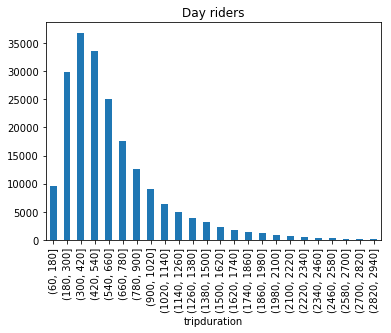

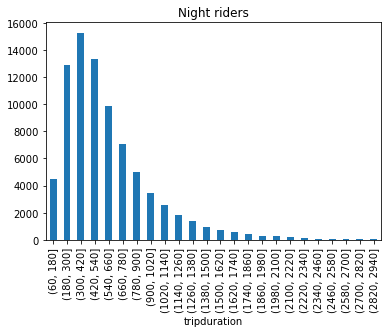

In [45]:
bins = np.arange(60,3000,120)
axD = day.tripduration.groupby(pd.cut(day.tripduration, bins)).agg([count_nonzero]).plot(kind='bar',
                                                                legend=False)
axD.set_title("Day riders")

axN = night.tripduration.groupby(pd.cut(night.tripduration, bins)).agg([count_nonzero]).plot(kind='bar', 
                                                                legend=False)
axN.set_title("Night riders")

**Figure 1: Distribution of tripduration by day and night riders **


this is how the cumulative distributions look like.  Notice that i am normalizing them! if i want to reat an observed distribution like a probablility distribution i have to normalize it

              count_nonzero
tripduration               
(60, 180]          0.007471
(180, 300]         0.019052
(300, 420]         0.025854
(420, 540]         0.024722
(540, 660]         0.022867
(660, 780]         0.023126
(780, 900]         0.022206
(900, 1020]        0.020347
(1020, 1140]       0.019777
(1140, 1260]       0.017887
(1260, 1380]       0.016476
(1380, 1500]       0.013242
(1500, 1620]       0.010590
(1620, 1740]       0.008483
(1740, 1860]       0.006619
(1860, 1980]       0.004841
(1980, 2100]       0.004210
(2100, 2220]       0.003402
(2220, 2340]       0.002637
(2340, 2460]       0.001745
(2460, 2580]       0.000950
(2580, 2700]       0.000548
(2700, 2820]       0.000177
(2820, 2940]       0.000000


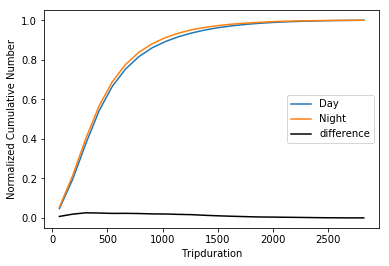

In [78]:
#print df.ageS, df.ageS.cumsum()

csD=day.tripduration.groupby(pd.cut(day.tripduration, bins)).agg([count_nonzero]).cumsum()

csN=night.tripduration.groupby(pd.cut(night.tripduration, bins)).agg([count_nonzero]).cumsum()

print (np.abs(csD / csD.max()-csN / csN.max()))

pl.plot(bins[:-1] + 5, csD / csD.max(), label = "Day")
pl.plot(bins[:-1] + 5, csN / csN.max(), label = "Night")
pl.plot(bins[:-1] + 5, np.sqrt(csN / csN.max() - csD / csD.max())**2, 'k-',
        label = "difference")
pl.xlabel("Tripduration")
pl.ylabel("Normalized Cumulative Number")
pl.legend()

** Figure 2: the cumulative distribution of CitiBike riders' tripduration by day and night riders** 

They look similar! But the difference gets to 10%. If I wanted to code the KS test by hand I woud have everything I need: the normalized cumulative distributions can be subtracted from each other and the max distance can calculated. 

Notice that there may be NaN values you are gonna have to deal with! 
You can do that for example with a Boolean statementsuch as  df.ageF[~np.isnan(df.ageF)] or you can use numpy functions that deal with Nan values: nansum, nanmean, nanstd...

lets run the scipy KS test

In [79]:
import scipy.stats
#remember that your imports should all be at the top. I leave it here to hightlight that this package is needed at this point of the workflow

# KS tests to compare 2 samples

http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.ks_2samp.html

the KS test in scipy returns the p-value BUT make sure you understand what the NULL is! read the documentation carefully! what is the null hypothesis that you can/cannot reject?

In [80]:
ks = scipy.stats.ks_2samp(df.day.tripduration, df.night.tripduration)
print (ks)

Ks_2sampResult(statistic=0.02957543239804731, pvalue=1.1838216053931929e-44)


**  FILL IN THE CELL BELOW!**

The scipy.stats KS tests returns the D-KS statistic and the p-value

The KS test tests if two samples are drawn from the same distribution considering the hypotheses:
Null Hypothesis (H0): The two samples being tested are drawn from the same distribution
Alternate Hypothesis (H1): The two samples being tested are drawn from different distributions

Null hypothesis is rejected if p-value is less than the set alpha value

Here,For alpha=0.05, the null hypothesis can be rejected as p-value is less than 0.05


The scipy.stats KS test already tells me the significance and the p-value. 

The next few cells are here just to show you how you would obtain the same result by hand, but they are **not required**. 

Remember: the Null hypothesis is rejected if 

$D_KS(n1,n2) > c(\alpha) \sqrt{\frac{(n1 + n2)}{n1n2}}$

(see class notes) where $c(\alpha$) is the inverse of the KS distribution, and you do not have to know how to get that cause there are tables that list critical values!! 

http://www.real-statistics.com/tests-normality-and-symmetry/statistical-tests-normality-symmetry/kolmogorov-smirnov-test/kolmogorov-distribution/

But also this result depends in your choice of binning through, and thustheresultyou get by hand may not be exactly the same as the one the KS returns. Either way: this is how you would calculate the KS statistics by hand.

In [81]:
#here is the critical values tablel. Have you chosen your significance level yet?? you should do it first thing!
from IPython.display import Image
#Image(filename="../plotsforclasses/ks2sample_table.png")

In [94]:
## your words here!...
## this cell is for you to redo the test with reducted dataset 
## and tell me what the scipy ks test returned and what it means in terms of NULL HYPOTHESIS
df2=df.sample(len(df)/200)
day2 = df2[(df2['date'].dt.hour >=6) & (df2['date'].dt.hour < 18) ] 
night2 = df2[(df2['date'].dt.hour >=18) | (df2['date'].dt.hour < 6) ] 

night2.describe()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender
count,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,400.000000,405.000000
mean,755.669136,416.187654,40.735403,-73.990677,459.656790,40.735241,-73.989305,17930.488889,1977.517500,1.195062
std,1714.924823,241.053144,0.019330,0.011792,386.940223,0.019344,0.011977,2026.079332,11.204175,0.426795
min,74.000000,72.000000,40.682166,-74.017134,79.000000,40.680342,-74.017134,14535.000000,1945.000000,0.000000
25%,341.000000,318.000000,40.722992,-73.998522,318.000000,40.724537,-73.997236,16232.000000,NaN,1.000000
50%,520.000000,411.000000,40.737262,-73.990765,417.000000,40.737050,-73.990026,17860.000000,NaN,1.000000
75%,805.000000,494.000000,40.751396,-73.982050,491.000000,40.749718,-73.981656,19705.000000,NaN,1.000000
max,31330.000000,2022.000000,40.770513,-73.953990,3002.000000,40.771522,-73.953820,21672.000000,1998.000000,2.000000


In [103]:
ks2 = scipy.stats.ks_2samp(day2.tripduration, night2.tripduration)
print (ks2)

Ks_2sampResult(statistic=0.030564615496122396, pvalue=0.94615448783837963)


Here,For alpha=0.05, the null hypothesis cannot be rejected as p-value is greater than 0.05

# Now retest using a test for correlation. 

That will answer a slightly different question though - formulate the NULL appropriately. The tests for correlations (generally) requires the variable to be paired, so that I can tell if x changes does y change similarly. But the datasets are of different size! You will need to reduce them to the same size. You can do that by subsampling of the data: take only 1 ride every of 200, which you can achieve "slicing and broadcasting" the array or using one of the python function (built in python numpy.random.choice() functions for example: Docstring:
choice(a, size=None, replace=True, p=None)

Generates a random sample from a given 1-D array

        .. versionadded:: 1.7.0

Parameters
...

But make sure you understand how to use it! there is an option "replace" which you should think about.

# Pearson's  test for correlation

** notice that the Pearson's is a pairwise test: the samples need to be **
 a. the same size
 
 b. sorted! (how??)
    
http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html#scipy.stats.pearsonr

**Hypotheses**

Null Hypothesis(H0) : There is no correlation between tripduration for day and night riders

Alternate Hypothesis(H1) : Tripduration for day and night riders are correlated

In [98]:
# your code here!
# wrangle the data as needed
# please perform the Pearson's test 
# and tell me what you find in terms of NULL hypothesis
daytrip_s= day.tripduration.sort(inplace = False)
nighttrip_s= night.tripduration.sort(inplace = False)


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting


In [101]:
ps = scipy.stats.pearsonr(daytrip_s.sample(len(nighttrip_s)), 
                            nighttrip_s)
print(ps)
print ("Pearson’s correlation coefficient is %f, and p-value is %f" %(ps[0],ps[1]))

(0.00091769003056486474, 0.79357984334279952)
Pearson’s correlation coefficient is 0.000918, and p-value is 0.793580


As p-value is greater than alpha(0.05), the null hypothesis cannot be rejected. The two datasets might not be correlated

# Spearman's  test for correlation

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html#scipy.stats.spearmanr

** Hypotheses **

Null hypothesis(H0) : There is no correlation between the two samples

Alternate hpothesis(H1) : The two samples are correlated

In [110]:

# your code here!
# wrangle the data as needed
# please perform the Spearman's test and tell me what you find in terms of NULL hypothesis
spr = scipy.stats.spearmanr(day.tripduration.sample(len(night.tripduration)), 
                            night.tripduration)
spr

SpearmanrResult(correlation=-0.0017827661844297769, pvalue=0.61122335358769175)

** please comment on the numbers that you get in the light of the scipy manual: what is rerutned? what does it mean??**

The correlation coefficient between the two samples is -0.00178 which is weak. The p-value is greater than alpha(0.05). Hence the null hypothesis cannot be rejected. The two samples might not be correlated